# Multiple Linear Regression

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


## Importing the dataset

In [2]:
%matplotlib inline
sns.set_style('whitegrid')
df = pd.read_csv(r'C:\Users\phuoc\OneDrive\Desktop\School\ML Boot Camp\Projects\Project_2\Occupancy_Data.csv')
df.head(5)


,Date Time,Occupancy,Temperature,Humidity,Light,CO2,HumidityRatio
0,02/02/15 14:19,1,23.7000,26.272,585.200000,749.200000,0.004764
1,02/02/15 14:19,1,23.7180,26.290,578.400000,760.400000,0.004773
2,02/02/15 14:21,1,23.7300,26.230,572.666667,769.666667,0.004765
3,02/02/15 14:22,1,23.7225,26.125,493.750000,774.750000,0.004744
4,02/02/15 14:23,1,23.7540,26.200,488.600000,779.000000,0.004767


# Encoding the dataset

In [3]:
# We encode the colums 'Country' and 'Status'
#df["Country"]= df["Country"].astype('category')
#df.dtypes
#df["Status"]= df["Status"].astype('category')
#df.dtypes
#df["Country"]= df["Country"].cat.codes
#df["Status"]= df["Status"].cat.codes
#df.head(5)


## Raw data visualisation and statistics

In [4]:
df.describe()

,Occupancy,Temperature,Humidity,Light,CO2,HumidityRatio
count,2665.000000,2665.000000,2665.000000,2665.000000,2665.000000,2665.000000
mean,0.364728,21.433876,25.353937,193.227556,717.906470,0.004027
std,0.481444,1.028024,2.436842,250.210906,292.681718,0.000611
min,0.000000,20.200000,22.100000,0.000000,427.500000,0.003303
25%,0.000000,20.650000,23.260000,0.000000,466.000000,0.003529
50%,0.000000,20.890000,25.000000,0.000000,580.500000,0.003815
75%,1.000000,22.356667,26.856667,442.500000,956.333333,0.004532
max,1.000000,24.408333,31.472500,1697.250000,1402.250000,0.005378


In [5]:
df

,Date Time,Occupancy,Temperature,Humidity,Light,CO2,HumidityRatio
0,02/02/15 14:19,1,23.700000,26.272000,585.200000,749.200000,0.004764
1,02/02/15 14:19,1,23.718000,26.290000,578.400000,760.400000,0.004773
2,02/02/15 14:21,1,23.730000,26.230000,572.666667,769.666667,0.004765
3,02/02/15 14:22,1,23.722500,26.125000,493.750000,774.750000,0.004744
4,02/02/15 14:23,1,23.754000,26.200000,488.600000,779.000000,0.004767
...,...,...,...,...,...,...,...
2660,04/02/15 10:38,1,24.290000,25.700000,808.000000,1150.250000,0.004829
2661,04/02/15 10:40,1,24.330000,25.736000,809.800000,1129.200000,0.004848
2662,04/02/15 10:40,1,24.330000,25.700000,817.000000,1125.800000,0.004841
2663,04/02/15 10:41,1,24.356667,25.700000,813.000000,1123.000000,0.004849


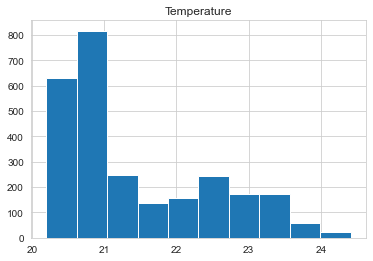

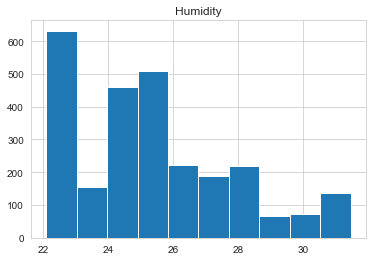

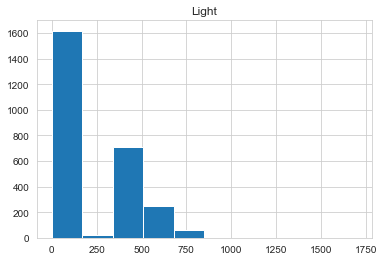

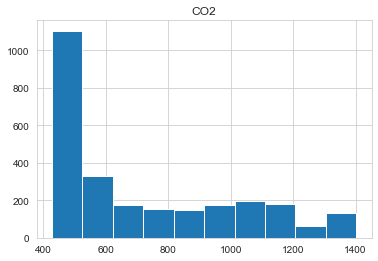

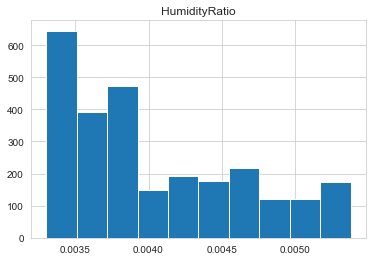

In [6]:
# histogram plots to visualise data distribution
from matplotlib import pyplot
df.hist(column = ['Temperature'])
df.hist(column = ['Humidity'])
df.hist(column = ['Light'])
df.hist(column = ['CO2'])
df.hist(column = ['HumidityRatio'])
#df.hist(column = ['Polio', 'Total expenditure'])
#df.hist(column = ['Diphtheria', 'HIV/AIDS'])
#df.hist(column = ['Thinness 5-9 years','Thinness 10-19 years'])

pyplot.show()


# #Taking care of missing data

In [7]:
df.isnull().sum() 

Date Time        0
Occupancy        0
Temperature      0
Humidity         0
Light            0
CO2              0
HumidityRatio    0
dtype: int64

In [8]:
sum(df.isnull().sum())

0


## Data cleaning Statregy: <br> 



In [9]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
df_values=df.values
df_norm= min_max_scaler.fit_transform(df_values[:, 1:])

#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()

#x = X.values #returns a numpy array
#x_scaled = min_max_scaler.fit_transform(x, Y)
df_norm = pd.DataFrame(df_norm, columns=['Occupancy', 'Temperature', 'Humidity', 'Light', 'CO2','HumidityRatio'])
df_norm 

,Occupancy,Temperature,Humidity,Light,CO2,HumidityRatio
0,1.0,0.831683,0.445132,0.344793,0.330033,0.704212
1,1.0,0.835960,0.447053,0.340787,0.341523,0.708308
2,1.0,0.838812,0.440651,0.337409,0.351030,0.704689
3,1.0,0.837030,0.429448,0.290912,0.356245,0.694383
4,1.0,0.844515,0.437450,0.287877,0.360605,0.705384
...,...,...,...,...,...,...
2660,1.0,0.971881,0.384102,0.476064,0.741472,0.735505
2661,1.0,0.981386,0.387943,0.477125,0.719877,0.744429
2662,1.0,0.981386,0.384102,0.481367,0.716389,0.741136
2663,1.0,0.987723,0.384102,0.479010,0.713516,0.744896


In [10]:
correlation=df_norm.corr(method='pearson')
print(correlation)


               Occupancy  Temperature  Humidity     Light       CO2  \
Occupancy       1.000000     0.705784  0.610764  0.927949  0.768030   
Temperature     0.705784     1.000000  0.716988  0.768428  0.870226   
Humidity        0.610764     0.716988  1.000000  0.561905  0.911611   
Light           0.927949     0.768428  0.561905  1.000000  0.769167   
CO2             0.768030     0.870226  0.911611  0.769167  1.000000   
HumidityRatio   0.700330     0.894548  0.951914  0.693286  0.964440   

               HumidityRatio  
Occupancy           0.700330  
Temperature         0.894548  
Humidity            0.951914  
Light               0.693286  
CO2                 0.964440  
HumidityRatio       1.000000  


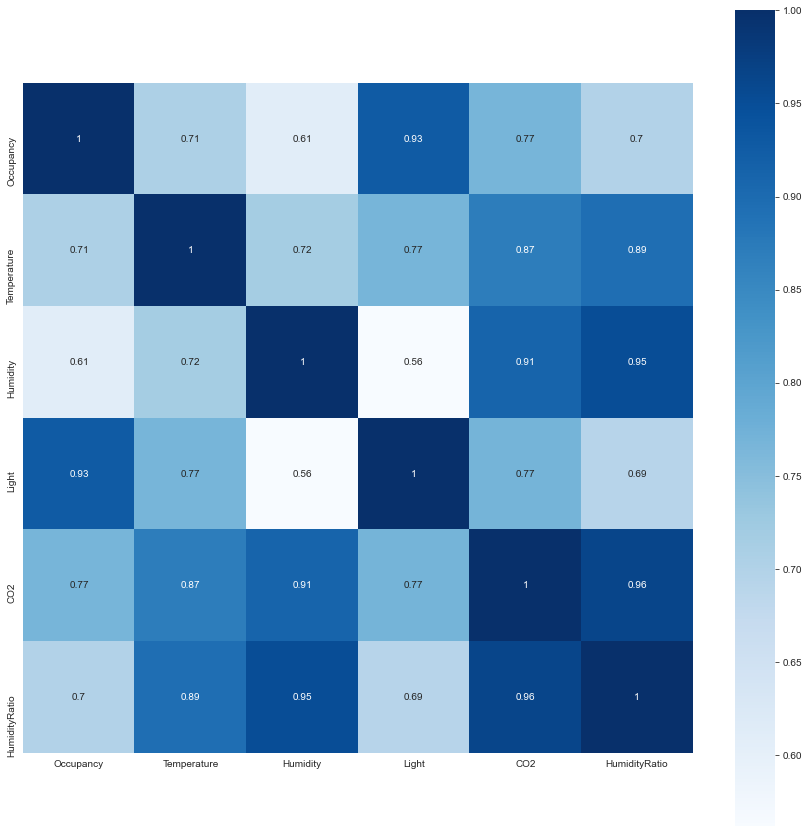

In [11]:
plt.figure(figsize=(15,15))
df_corr = df_norm.corr()

sns.heatmap(df_norm.corr(), square=True, annot=True, cmap="Blues");

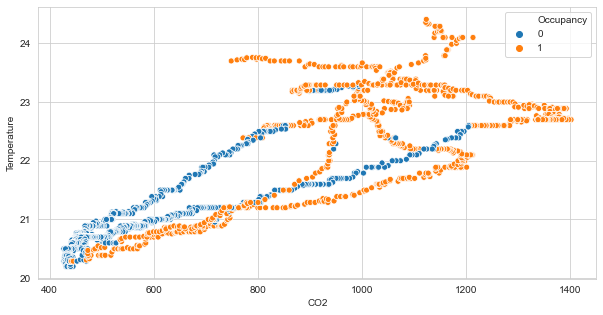

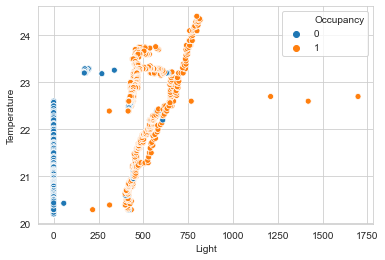

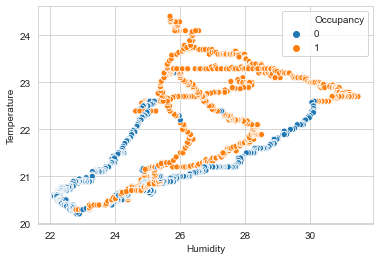

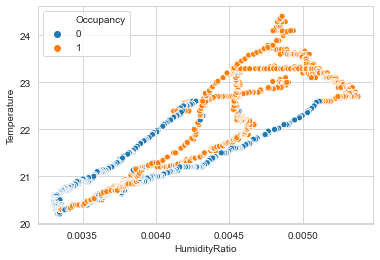

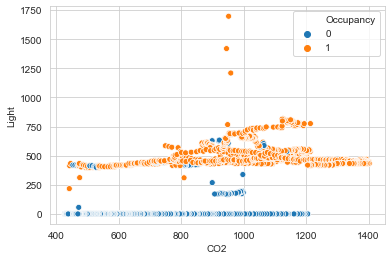

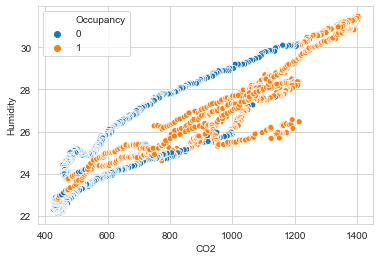

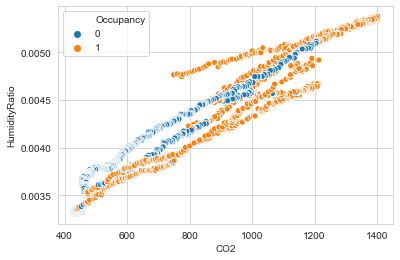

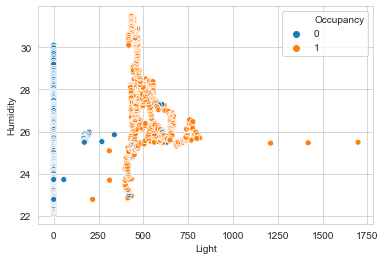

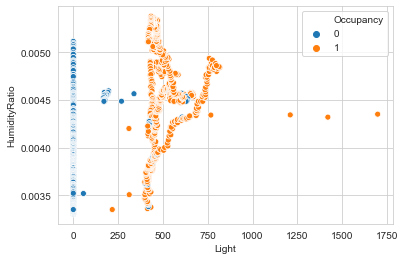

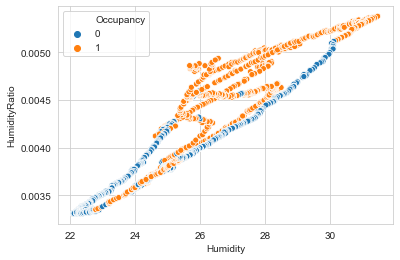

In [12]:
#scatter plots
plt.figure(figsize=(10, 5))
sns.set_style()
sns.scatterplot(data=df, x='CO2', y='Temperature', hue='Occupancy')
plt.show()
sns.scatterplot(data=df, x='Light', y='Temperature', hue='Occupancy')
plt.show()
sns.scatterplot(data=df, x='Humidity', y='Temperature', hue='Occupancy')
plt.show()
sns.scatterplot(data=df,x='HumidityRatio', y='Temperature', hue='Occupancy')
plt.show()
sns.scatterplot(data=df, x='CO2', y='Light', hue='Occupancy')
plt.show()
sns.scatterplot(data=df, x='CO2', y='Humidity', hue='Occupancy')
plt.show()
sns.scatterplot(data=df, x='CO2', y='HumidityRatio', hue='Occupancy')
plt.show()
sns.scatterplot(data=df, x='Light', y='Humidity', hue='Occupancy')
plt.show()
sns.scatterplot(data=df, x='Light', y='HumidityRatio', hue='Occupancy')
plt.show()
sns.scatterplot(data=df, x='Humidity', y='HumidityRatio', hue='Occupancy')
plt.show()


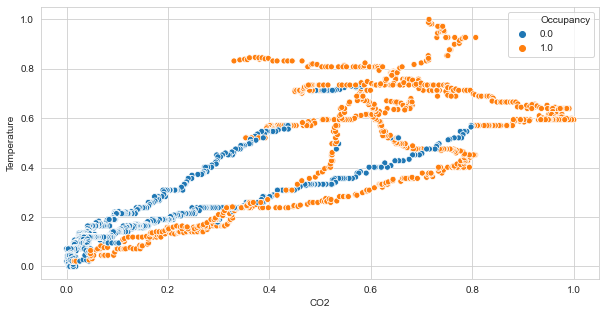

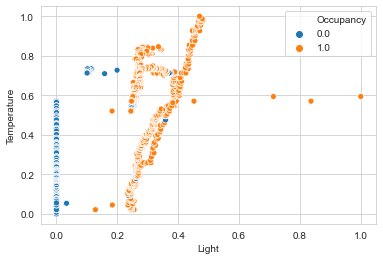

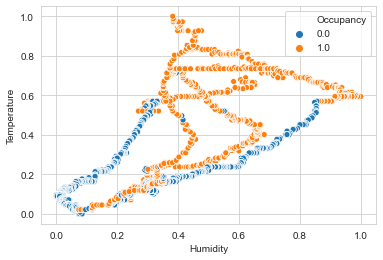

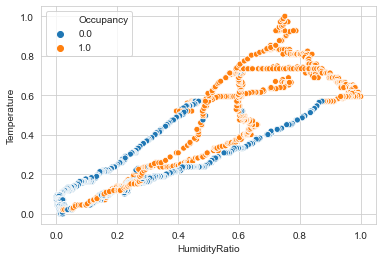

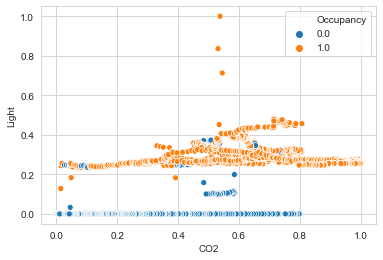

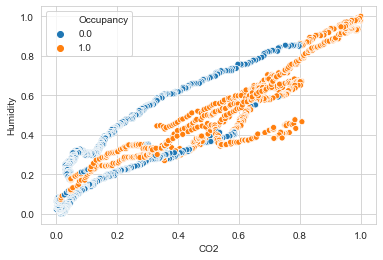

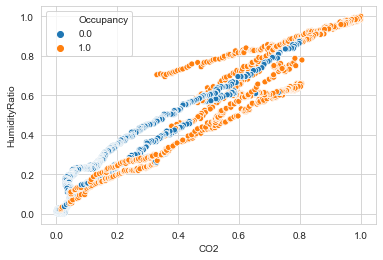

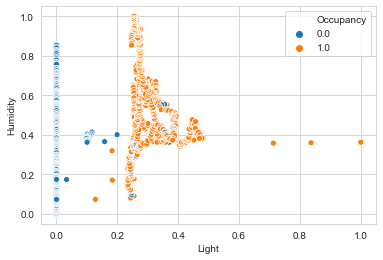

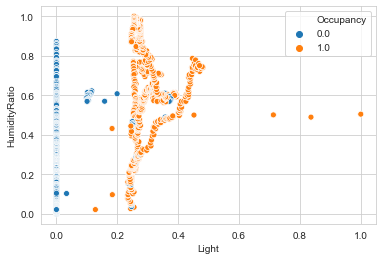

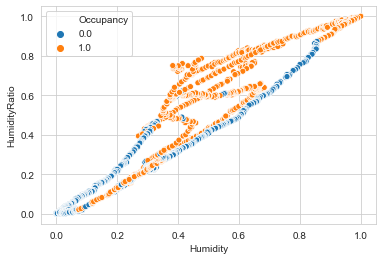

In [13]:
#scatter plots
plt.figure(figsize=(10, 5))
sns.set_style()
sns.scatterplot(data=df_norm, x='CO2', y='Temperature', hue='Occupancy')
plt.show()
sns.scatterplot(data=df_norm, x='Light', y='Temperature', hue='Occupancy')
plt.show()
sns.scatterplot(data=df_norm, x='Humidity', y='Temperature', hue='Occupancy')
plt.show()
sns.scatterplot(data=df_norm, x='HumidityRatio', y='Temperature', hue='Occupancy')
plt.show()
sns.scatterplot(data=df_norm, x='CO2', y='Light', hue='Occupancy')
plt.show()
sns.scatterplot(data=df_norm, x='CO2', y='Humidity', hue='Occupancy')
plt.show()
sns.scatterplot(data=df_norm, x='CO2', y='HumidityRatio', hue='Occupancy')
plt.show()
sns.scatterplot(data=df_norm, x='Light', y='Humidity', hue='Occupancy')
plt.show()
sns.scatterplot(data=df_norm, x='Light', y='HumidityRatio', hue='Occupancy')
plt.show()
sns.scatterplot(data=df_norm, x='Humidity', y='HumidityRatio', hue='Occupancy')
plt.show()

## Defining dependent and independent varialbes

In [14]:
Xx=df_norm.iloc[:, 1:]
        #5 & 11, 18 & 19, 20 & 21
               #,4:21]#[4,5,6,7,8,10,11,12,13,14,15,16,18,19,20,21]] #4:21]  # [10,20]]   [4,7,10,15,16,18,19,20,21] [4:8,10:16,18:21]
Yy=df_norm.iloc[:,0]
print(Xx)
print(Yy)

      Temperature  Humidity     Light       CO2  HumidityRatio
0        0.831683  0.445132  0.344793  0.330033       0.704212
1        0.835960  0.447053  0.340787  0.341523       0.708308
2        0.838812  0.440651  0.337409  0.351030       0.704689
3        0.837030  0.429448  0.290912  0.356245       0.694383
4        0.844515  0.437450  0.287877  0.360605       0.705384
...           ...       ...       ...       ...            ...
2660     0.971881  0.384102  0.476064  0.741472       0.735505
2661     0.981386  0.387943  0.477125  0.719877       0.744429
2662     0.981386  0.384102  0.481367  0.716389       0.741136
2663     0.987723  0.384102  0.479010  0.713516       0.744896
2664     1.000000  0.382146  0.470172  0.714542       0.750511

[2665 rows x 5 columns]
0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
2660    1.0
2661    1.0
2662    1.0
2663    1.0
2664    1.0
Name: Occupancy, Length: 2665, dtype: float64


## Splitting the dataset into the Training set and Test set

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xx, Yy, test_size = 0.2, random_state = 0)

In [16]:
print(X_test)
print(y_test)

      Temperature  Humidity     Light       CO2  HumidityRatio
1763     0.282772  0.607095  0.000000  0.388989       0.517565
795      0.071287  0.030942  0.000000  0.006155       0.014351
2099     0.140198  0.303548  0.000000  0.101052       0.231298
104      0.665347  0.631422  0.252762  0.650526       0.755898
1661     0.570297  0.881835  0.246870  0.833804       0.892759
...           ...       ...       ...       ...            ...
2321     0.099802  0.246679  0.000000  0.036009       0.173397
564      0.100990  0.013070  0.000000  0.017953       0.014675
2328     0.114059  0.253721  0.000000  0.038061       0.184798
1109     0.160000  0.285409  0.259832  0.274258       0.228164
666      0.095050  0.010670  0.000000  0.024724       0.010553

[533 rows x 5 columns]
1763    0.0
795     0.0
2099    0.0
104     1.0
1661    1.0
       ... 
2321    0.0
564     0.0
2328    0.0
1109    1.0
666     0.0
Name: Occupancy, Length: 533, dtype: float64


## Dimension reduction

In [17]:
#from sklearn.decomposition import PCA
#pca = PCA(n_components = 2)
#X_train = pca.fit_transform(X_train)
#X_test = pca.transform(X_test)
#explained_variance = pca.explained_variance_ratio_
#print(explained_variance)


## Training the Multiple Linear Regression model on the Training set

In [18]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)


SVC(kernel='linear', random_state=0)

## Predicting the Test set results

In [19]:
y_pred = classifier.predict(X_test)

## Confusion Matirx

In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[337  12]
 [  0 184]]


0.9774859287054409

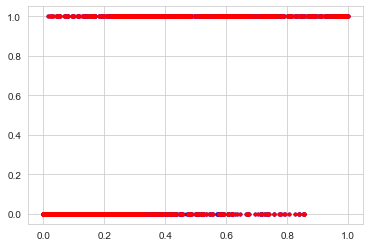

In [21]:
plt.plot(X_test,y_test,'.b')
plt.plot(X_test,y_pred,'.r')

In [22]:
#testing other Classifier Techniques

#classifier = SVC(kernel = 'linear', random_state = 0)
#classifier.fit(X_train, y_train)
#y_pred = classifier.predict(X_test)

In [23]:
#random forrest
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred_RanTree = clf.predict(X_test)


cm = confusion_matrix(y_test, y_pred_RanTree)
print(cm)
accuracy_score(y_test, y_pred_RanTree)

[[340   9]
 [  1 183]]


0.9812382739212008

In [24]:
#SVM but using rbf
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)
y_pred_SVM_rbf = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred_SVM_rbf)
print(cm)
accuracy_score(y_test, y_pred_SVM_rbf)

[[338  11]
 [  0 184]]


0.9793621013133208

In [25]:
#SVM but using poly
classifier = SVC(kernel = 'poly', random_state = 0)
classifier.fit(X_train, y_train)
y_pred_SVM_poly = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred_SVM_poly)
print(cm)
accuracy_score(y_test, y_pred_SVM_poly)

[[340   9]
 [  6 178]]


0.9718574108818011

In [31]:
#Trying Neural Networks (multilayer perceptron)
from sklearn.neural_network import MLPClassifier
maxScore = 0
maxi = 0
maxj = 0
for i in range(2,6):
    for j in range(2,6):
        clf_nn = MLPClassifier(solver='lbfgs',alpha=1e-5,hidden_layer_sizes=(i,j),random_state = 1)
        clf_nn.fit(X_train, y_train)#,batch_size=57, epochs=1000, validation_split=0.2)
        y_pred_nn = clf_nn.predict(X_test)
        print(clf_nn.loss_)

        cm = confusion_matrix(y_test, y_pred_nn)
        print("This is when the layer sizes is: %i,%i" %(i,j))
        print(cm)
        Score = accuracy_score(y_test, y_pred_nn)
        print(Score)
        if (Score > maxScore):
            maxScore= Score
            maxi = i
            maxj = j
print("the best score was when the layer size was: %i,%i with a score of %04f" %(maxi,maxj,maxScore))

0.06528176180188815
This is when the layer sizes is: 2,2
[[337  12]
 [  1 183]]
0.975609756097561
0.07939322568743162
This is when the layer sizes is: 2,3
[[337  12]
 [  0 184]]
0.9774859287054409
0.658745710146898
This is when the layer sizes is: 2,4
[[349   0]
 [184   0]]
0.6547842401500938


C:\Users\phuoc\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.06443700674700563
This is when the layer sizes is: 2,5
[[337  12]
 [  0 184]]
0.9774859287054409


C:\Users\phuoc\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.06442494429167403
This is when the layer sizes is: 3,2
[[338  11]
 [  1 183]]
0.9774859287054409


C:\Users\phuoc\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.06038527478200496
This is when the layer sizes is: 3,3
[[337  12]
 [  0 184]]
0.9774859287054409
0.07698972203763119
This is when the layer sizes is: 3,4
[[337  12]
 [  1 183]]
0.975609756097561
0.07039981654056696
This is when the layer sizes is: 3,5
[[338  11]
 [  1 183]]
0.9774859287054409
0.6587456784122554
This is when the layer sizes is: 4,2
[[349   0]
 [184   0]]
0.6547842401500938
0.06902726073484987
This is when the layer sizes is: 4,3
[[338  11]
 [  0 184]]
0.9793621013133208
0.0678913729188452
This is when the layer sizes is: 4,4
[[338  11]
 [  1 183]]
0.9774859287054409


C:\Users\phuoc\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.062462976804802305
This is when the layer sizes is: 4,5
[[338  11]
 [  1 183]]
0.9774859287054409
0.14925976046982337
This is when the layer sizes is: 5,2
[[330  19]
 [ 19 165]]
0.9287054409005628
0.06686163232683019
This is when the layer sizes is: 5,3
[[338  11]
 [  1 183]]
0.9774859287054409
0.06443012214562417
This is when the layer sizes is: 5,4
[[337  12]
 [  1 183]]
0.975609756097561
0.06594926232048752
This is when the layer sizes is: 5,5
[[338  11]
 [  1 183]]
0.9774859287054409
the best score was when the layer size was: 4,3 with a score of 0.979362


C:\Users\phuoc\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [27]:
#import matplotlib.pyplot as plt
#plt.style.use('fivethirtyeight')
#plt.plot(clf_nn.history['loss'])
#plt.plot(clf_nn.history['val_loss'])
#plt.title('Model loss')
#plt.ylabel('Loss')
#plt.xlabel('Epoch')
#plt.legend(['Train', 'Val'], loc='upper right')
#plt.show()

In [28]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, valid_scores = learning_curve(SVC(kernel='linear'), X_train, y_train,cv=5)

[ 170  554  937 1321 1705]


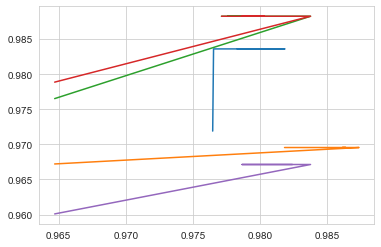

In [29]:
print(train_sizes)
plt.plot(train_scores, valid_scores)
#plt.plot(X_test,y_pred,'.r')

[[9.98800239e-01 1.19976118e-03]
 [9.99940655e-01 5.93451328e-05]
 [9.99721559e-01 2.78440522e-04]
 ...
 [9.99745355e-01 2.54644865e-04]
 [8.98527573e-02 9.10147243e-01]
 [9.99958434e-01 4.15662175e-05]]


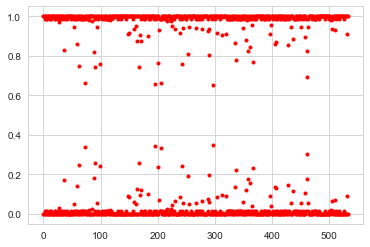

In [30]:
loss_values = clf_nn.predict_proba(X_test)
print(loss_values)
plt.plot(loss_values,'r.')